In [1]:
import pandas as pd
import numpy as np
#import matplotlib as mpl
import os
import sys


In [2]:
file_path = '/home/kerod/Downloads/performance_data.csv'

In [3]:
file = pd.read_csv(file_path, index_col=None)

In [5]:
file.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [6]:
file .shape

(905, 4)

## In mobile advertising, two key metrics often analyzed are:

## Click-Through Rate (CTR):

- Definition: CTR measures the percentage of people who see your ad and then click on it. It's calculated by dividing the number of clicks your ad receives by the number of times it's shown (impressions). CTR = (Clicks / Impressions) * 100%
- Interpretation: A higher CTR indicates a more engaging and relevant ad that effectively captures user attention and prompts them to take further action. A low CTR signifies an ad that might be poorly targeted, irrelevant, or visually unappealing.
- Average Rates: Mobile ad CTRs typically range between 0.5% and 2%, depending on industry, format, and platform.

## Engagement Rate (ER):

- Definition: While "ER" can have multiple interpretations depending on the specific platform or context, a commonly used definition in mobile advertising refers to Estimated Revenue (ER). This metric represents the projected average revenue earned from each user who installs your app through your ad campaign.
- Interpretation: A higher ER suggests a more targeted and profitable ad campaign, attracting users likely to generate income for your app. A lower ER might indicate poor targeting, attracting users who don't convert into paying customers.
- Calculation: Calculating ER can vary depending on the platform and available data. It often involves factors like in-app purchase data, subscription rates, and ad revenue models.
- Optimizing ER: Achieving a high ER requires aligning your targeting with high-value users, optimizing your app for conversions, and effectively monetizing users within your app.

It's important to note that both CTR and ER are valuable metrics, but they assess different aspects of your mobile ad campaign's effectiveness:

## CTR: Measures ad engagement and how well it attracts clicks.
## ER: Measures user value and the expected revenue generated from those clicks.

In [50]:
file.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


In [53]:
print(f"The maximum Engagement Rate is {file['ER'].max()}")
print(f"The minimum Engagement Rate is {file['ER'].min()}")
print(f"The maximum Click Through Rate is {file['CTR'].max()}")
print(f"The maximum Click Through Rate is {file['CTR'].min()}")

The maximum Engagement Rate is 0.5244978411864089
The minimum Engagement Rate is 0.0
The maximum Click Through Rate is 0.2974101921470342
The maximum Click Through Rate is 0.0


In [64]:
max_index = file['ER'].idxmax()
max_row = file.loc[max_index]
max_row

game_id                          0792c911c288bd241c1e2a2b64bce488
preview_link    https://s3.eu-west-1.amazonaws.com/a.futureadl...
ER                                                       0.524498
CTR                                                      0.025249
Name: 357, dtype: object

In [73]:
min_index = file['ER'].idxmin()
min_row = file.loc[min_index]
min_row

'adunit-western-union-sensory-unit-swipe-right-tap-mpu'

In [75]:
max_index = file['CTR'].idxmax()
max_row = file.loc[max_index]
max_row

game_id                          6befe54086758294b47addf0c12052a7
preview_link    https://s3.ap-east-1.amazonaws.com/a.futureadl...
ER                                                       0.327068
CTR                                                       0.29741
Name: 161, dtype: object

In [71]:
min_index = file['CTR'].idxmin()
min_row = file.loc[min_index]
min_row

game_id         adunit-western-union-sensory-unit-swipe-right-...
preview_link    https://s3.us-west-1.amazonaws.com/a.futureadl...
ER                                                            0.0
CTR                                                           0.0
Name: 9, dtype: object

In [13]:
!pip install matplotlib 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 246.8 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 169.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 188.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 361.6 kB/s eta 0:00:0000:0100:01


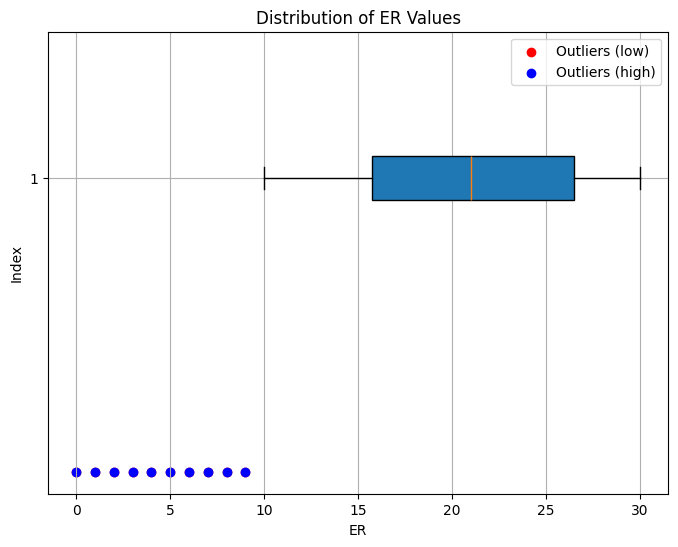

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create sample data
data = {'ER': [10, 25, 15, 30, 20, 18, 22, 27, 12, 28]}
file = pd.DataFrame(data)

# Calculate quartiles
q1 = file['ER'].quantile(0.25)
q2 = file['ER'].quantile(0.5)
q3 = file['ER'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate outliers (values outside 1.5 IQR below Q1 or above Q3)
outliers_low = file['ER'] < (q1 - 1.5 * iqr)
outliers_high = file['ER'] > (q3 + 1.5 * iqr)

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(file['ER'], vert=False, patch_artist=True)

# Highlight outliers
plt.scatter(outliers_low.index, outliers_low.values, marker='o', color='red', label='Outliers (low)')
plt.scatter(outliers_high.index, outliers_high.values, marker='o', color='blue', label='Outliers (high)')

# Customize the plot
plt.xlabel('ER')
plt.ylabel('Index')
plt.title('Distribution of ER Values')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 749.7 kB/s eta 0:00:00a 0:00:01


<Axes: xlabel='None', ylabel='ER'>

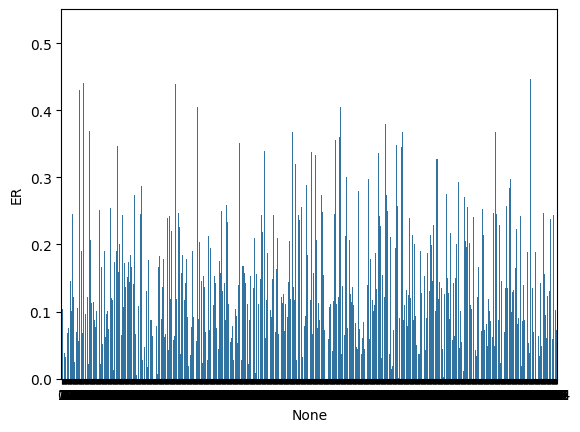

In [24]:
import seaborn as sns
sns.barplot(x=file.index, y=file['ER'])

<Axes: xlabel='ER', ylabel='Count'>

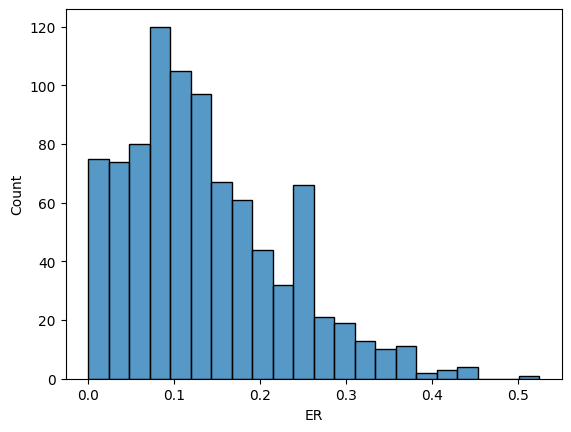

In [25]:
sns.histplot(x=file['ER'])

<Axes: xlabel='CTR', ylabel='Count'>

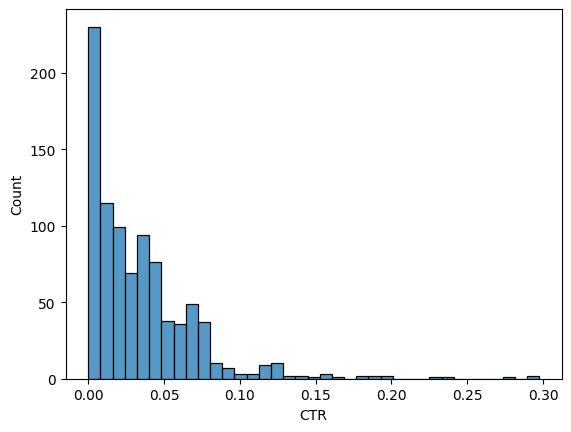

In [26]:
sns.histplot(x=file['CTR'])

In [56]:
count = file[file['ER'] >= 0.1].shape[0]
print(f"{count} amount of Ads has generated atleast 0.1% ER")

539 amount of Ads has generated atleast 0.1% ER


In [57]:
counts = file[file['CTR'] >= 0.1].shape[0]
print(f"{counts} amount of Ads has generated atleast 0.1% CTR")

44 amount of Ads has generated atleast 0.1% CTR


In [36]:
ctr = file['CTR']
er = file['ER']

In [37]:
correlation = er.corr(ctr)
print(f"Correlation between ER and CTR: {correlation:.2f}")


Correlation between ER and CTR: 0.45


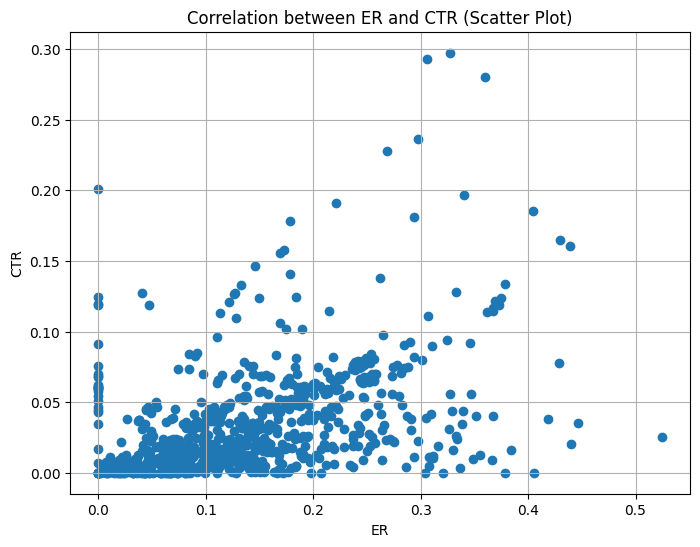

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(er, ctr)
plt.xlabel('ER')
plt.ylabel('CTR')
plt.title('Correlation between ER and CTR (Scatter Plot)')
plt.grid(True)
plt.show()


In [42]:
file2 = file[['ER','CTR']]

In [47]:
correlation_matrix = file2.corr()

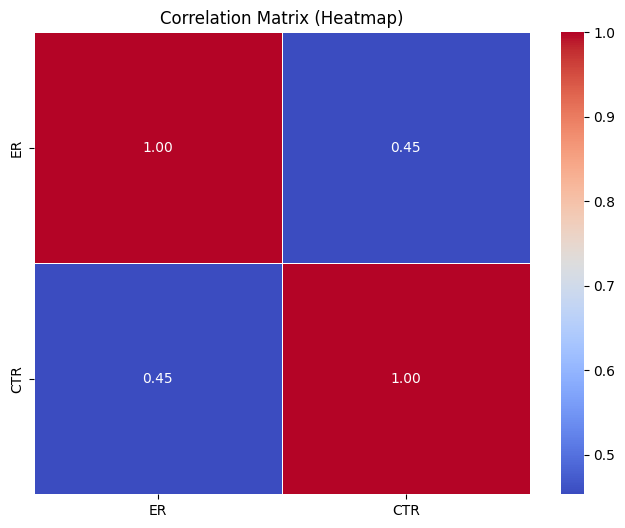

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix (Heatmap)')
plt.show()


/tmp/ipykernel_33163/1512189049.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=file['ER'], shade=True)
/tmp/ipykernel_33163/1512189049.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=file['CTR'], shade=True)


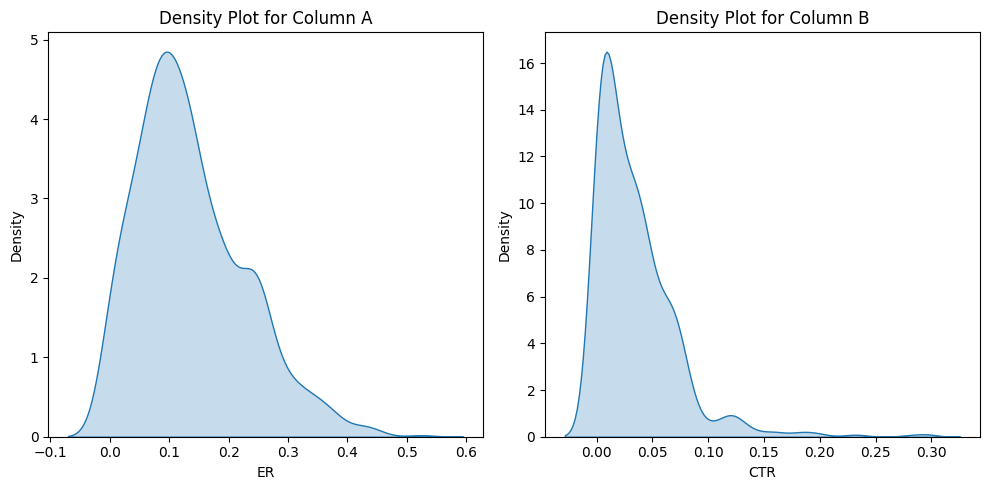

In [51]:
# Plot KDE plots for each column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=file['ER'], shade=True)
plt.title('Density Plot for Column A')

plt.subplot(1, 2, 2)
sns.kdeplot(data=file['CTR'], shade=True)
plt.title('Density Plot for Column B')

plt.tight_layout()
plt.show()


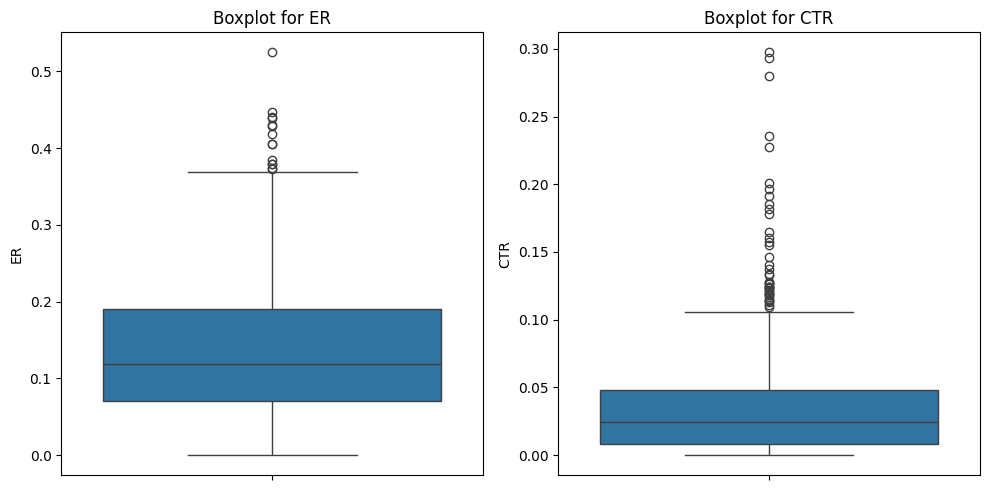

In [58]:
# Plot boxplots for each column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=file['ER'])
plt.title('Boxplot for ER')

plt.subplot(1, 2, 2)
sns.boxplot(data=file['CTR'])
plt.title('Boxplot for CTR')

plt.tight_layout()
plt.show()


In [4]:
#top 100 ads (ER and CTR scores)
top_100_ER = file.nlargest(100, 'ER')

top_100_CTR = file.nlargest(100, 'CTR')


In [8]:
top_100_CTR_ID =  top_100_CTR['game_id'].tolist()
top_100_ER_ID =  top_100_ER['game_id'].tolist()

In [14]:

from collections import Counter

counter1 = Counter(top_100_CTR_ID)
counter2 = Counter(top_100_ER_ID)

common_values = [ID for ID, count in counter1.items() if counter2[ID] == count]
print(common_values)


['6befe54086758294b47addf0c12052a7', 'f033db746b20e747ee528caa07f0b2de', 'eb641577b39bf60665e3130ac0d4e301', '79a672060e901ce418230c3959619cca', '77af46ea55c251a18213104bd760d1d2', 'adunit-vodacom-ciot-curve-v1-mob', 'adunit-mouser-user-choice-flight4-canada-cpe-mob', 'c823124ca76c00a9d3b79380e5bdfd29', '6a3dbf08b82e45b3f3e79844f3a9aa18', 'adunit-mouser-user-choice-flight4-uk-cpe-mob', 'adunit-scotch-brite-scrub-dots-sponge-tap-thai-mob', 'df91c37d7078b8b406deaea243bb3746', 'adunit-mouser-user-choice-v3-uk-cpe-mob', '3ff8db0779a25d3a9b92aebfb0eebe69', '7db3a9c286b1a445845bad68ff95f2bb', '3ba7994ec2ea0b953b57457bd25ac857', '034c0fa142311896c1b1b6900487d2fb', '0383071848070b93a8a9f0c82c06e5e4', '3c5828449ad87b05b5dedf0b4787242a', '251daf76d78711e74c9b441f4bb62834', '097b04b65ad1608a869f2fb08909a612', '03231e84227b5038d1ce9c302019da8c', 'bb8342d60fc04fb8c4fcfdbc3025f4d9', 'adunit-vodacom-ciot-curve-mob', 'adunit-the-botanist-gin-mob', '6d72ce3e20781f20fb420b30d3dd8b0e', '65299151bf4cbd182

In [15]:
len(common_values)

35

In [ ]:
#add the source and target  dir

# source_dir = "./assets"
# target_dir = "./train_data"

# for common_value in common_values:
#         current_dir = os.path.join(source_dir, str(common_value))
#         top_Ad_dir = os.path.join(target_dir, str(common_value))
